/home/ubuntu/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
XGBoost:   0%|          | 0/5 [00:00<?, ?it/s]

[*] load dataset : ./dataset_test_case_01.csv
[*] train set split
[*] train XGBoost
[*] train result : 
	Accuracy 	:  0.9311506332524926
	Percision 	:  0.9330167542116381
	Recall 		:  0.9311506332524926
	F1-Score 	:  0.931561107413692
[*] Confusion matrix : 


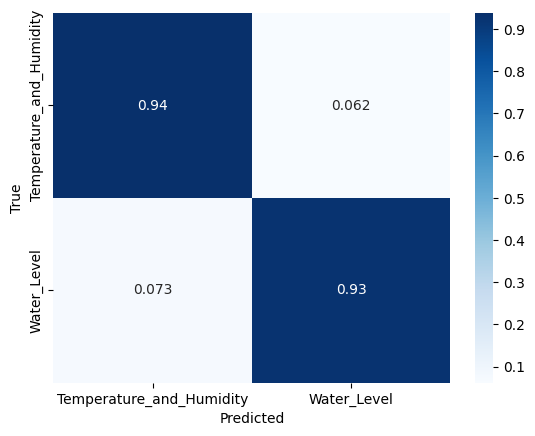

[*] Feature Importances: 
[0.03153768 0.01976928 0.81635654 0.10445093 0.02788556]

flow_duration: 0.032
mqtt_duration: 0.020
mqtt_connection_duration: 0.816
mqtt_connection_ack_duration: 0.104
mqtt_disconnection_duration: 0.028


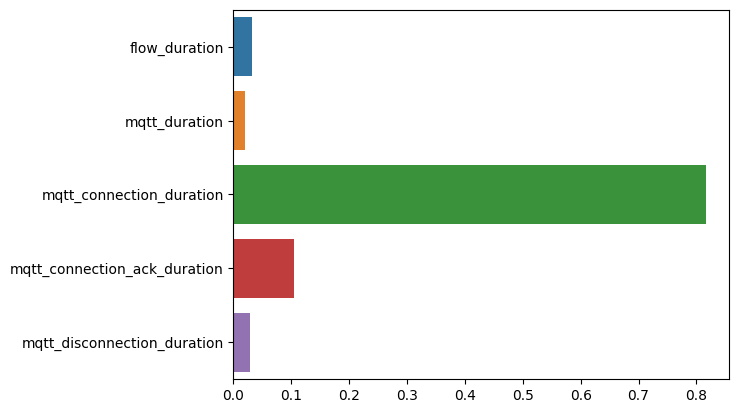

XGBoost:  20%|██        | 1/5 [00:07<00:28,  7.06s/it]

[*] load dataset : ./dataset_test_case_02.csv
[*] train set split
[*] train XGBoost
[*] train result : 
	Accuracy 	:  0.936987115503303
	Percision 	:  0.9388231621629539
	Recall 		:  0.936987115503303
	F1-Score 	:  0.9377204581597922
[*] Confusion matrix : 


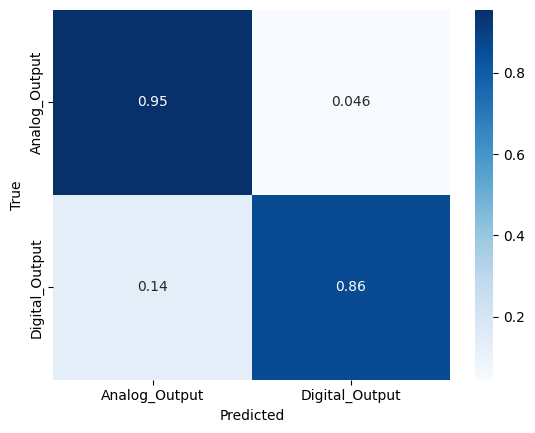

[*] Feature Importances: 
[0.03227871 0.02143577 0.774811   0.13885115 0.03262326]

flow_duration: 0.032
mqtt_duration: 0.021
mqtt_connection_duration: 0.775
mqtt_connection_ack_duration: 0.139
mqtt_disconnection_duration: 0.033


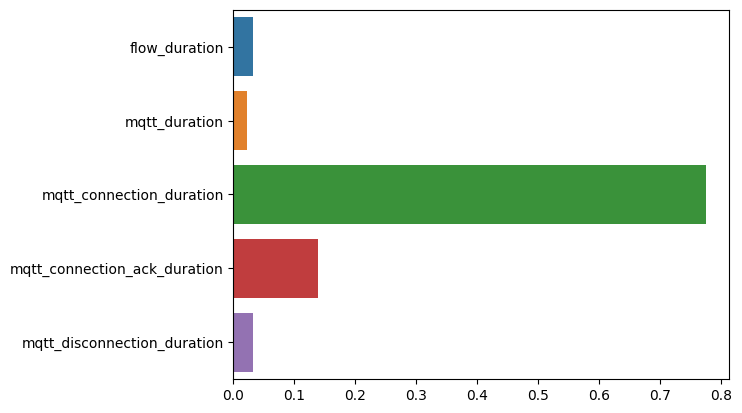

XGBoost:  40%|████      | 2/5 [00:11<00:17,  5.73s/it]

[*] load dataset : dataset_test_case_03_Digital.csv
[*] train set split
[*] train XGBoost
[*] train result : 
	Accuracy 	:  0.9458193828612795
	Percision 	:  0.9471101113642888
	Recall 		:  0.9458193828612795
	F1-Score 	:  0.9456018841639968
[*] Confusion matrix : 


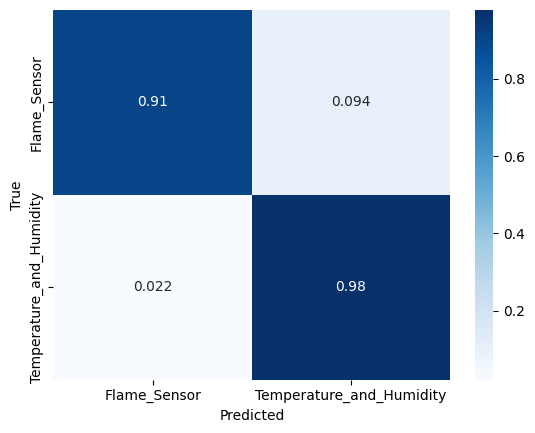

[*] Feature Importances: 
[0.02546033 0.01741267 0.8453372  0.08735202 0.02443776]

flow_duration: 0.025
mqtt_duration: 0.017
mqtt_connection_duration: 0.845
mqtt_connection_ack_duration: 0.087
mqtt_disconnection_duration: 0.024


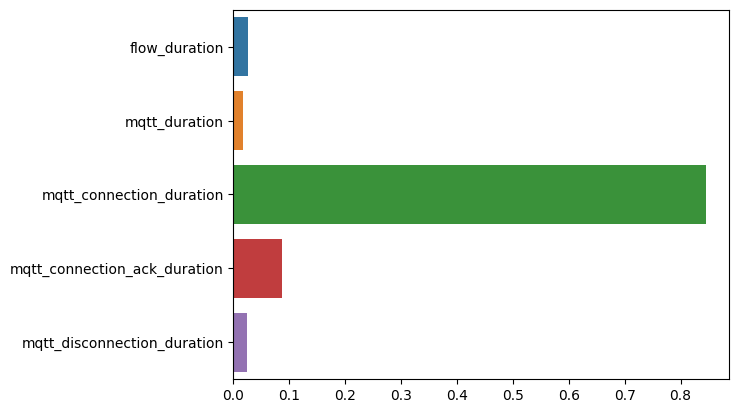

XGBoost:  60%|██████    | 3/5 [00:14<00:08,  4.19s/it]

[*] load dataset : dataset_test_case_03_Analog.csv
[*] train set split
[*] train XGBoost
[*] train result : 
	Accuracy 	:  0.48480248856907276
	Percision 	:  0.4533620338217943
	Recall 		:  0.48480248856907276
	F1-Score 	:  0.41748987616649036
[*] Confusion matrix : 


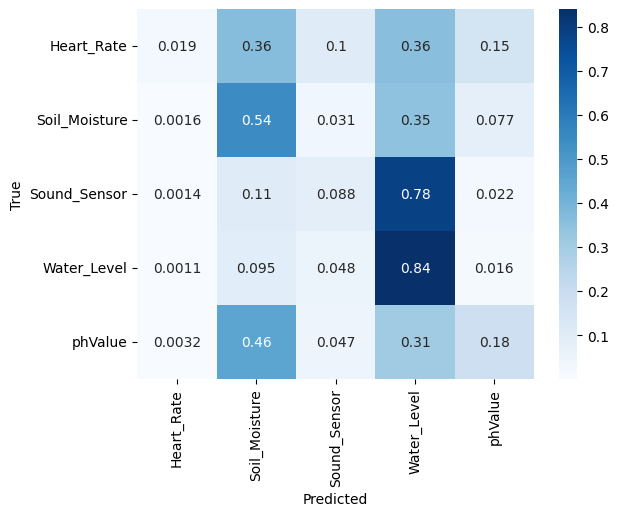

[*] Feature Importances: 
[0.0717116  0.1060795  0.19199298 0.45948535 0.17073053]

flow_duration: 0.072
mqtt_duration: 0.106
mqtt_connection_duration: 0.192
mqtt_connection_ack_duration: 0.459
mqtt_disconnection_duration: 0.171


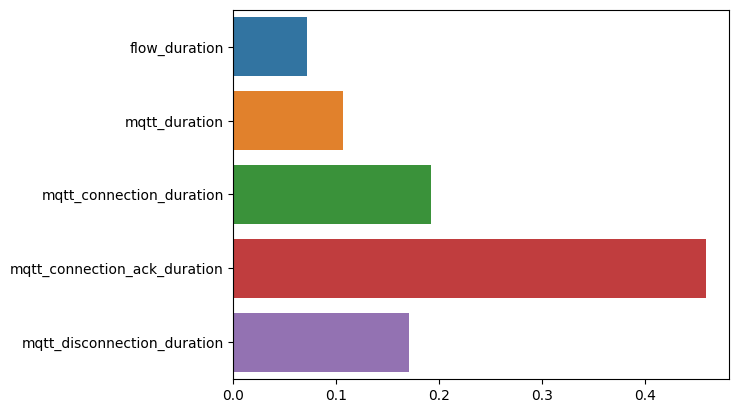

XGBoost:  80%|████████  | 4/5 [00:33<00:09,  9.98s/it]

[*] load dataset : dataset_test_case_04.csv
[*] train set split
[*] train XGBoost
[*] train result : 
	Accuracy 	:  0.4722656560570323
	Percision 	:  0.41639278084249076
	Recall 		:  0.4722656560570323
	F1-Score 	:  0.38806317615118424
[*] Confusion matrix : 


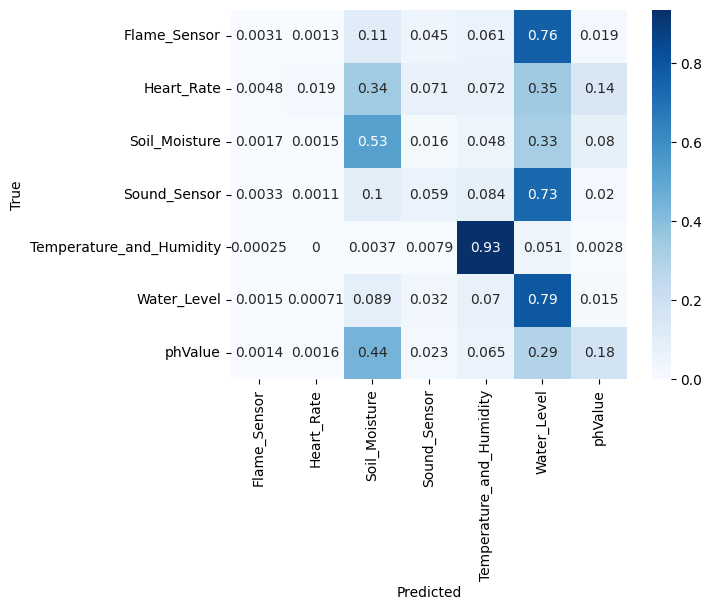

[*] Feature Importances: 
[0.05205862 0.04592012 0.4741508  0.29628238 0.13158809]

flow_duration: 0.052
mqtt_duration: 0.046
mqtt_connection_duration: 0.474
mqtt_connection_ack_duration: 0.296
mqtt_disconnection_duration: 0.132


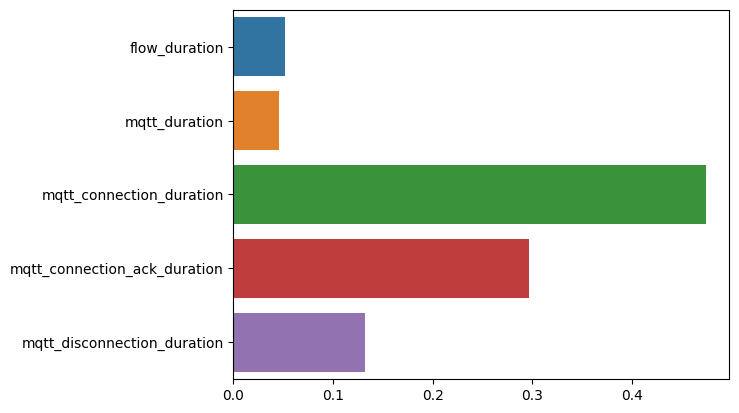

XGBoost: 100%|██████████| 5/5 [01:10<00:00, 14.16s/it]


In [1]:
# <-- import library -->
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import os
%matplotlib inline
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# <-- config -->
_TODAY = datetime.datetime.today().date()
dataset_dic = "./dataset/"
dataset_list = ["./dataset_test_case_01.csv", "./dataset_test_case_02.csv", "dataset_test_case_03_Digital.csv", "dataset_test_case_03_Analog.csv", "dataset_test_case_04.csv"]
IoT_list = ['Heart_Rate', 'Soil_Moisture', 'Sound_Sensor', 'Temperature_and_Humidity', 'Water_Level', 'phValue']
test_list = ['Digital_Output', 'Analog_Output']
features = ['src.port', 'flow_duration', 'mqtt_duration', 'mqtt_connection_duration', 'mqtt_connection_ack_duration', 'mqtt_disconnection_duration', 'IoT_label', 'test_label']
target_dict = {dataset_list[0] : features[-2], 
          dataset_list[1] : features[-1],
          dataset_list[2] : features[-2], 
          dataset_list[3] : features[-2],
          dataset_list[4] : features[-2]}

# <-- train -->
for dataset in tqdm(dataset_list, desc='XGBoost', position=0):
    print('[*] load dataset : ' + dataset)
    df = pd.read_csv(dataset_dic + dataset)
    # <-- train set split -->
    print('[*] train set split')
    train_features = features[1:-2]
    target = target_dict[dataset]

    label = df[target].unique()
    class_mapping = {cls: i for i, cls in enumerate(label)}
    df[target] = df[target].map(class_mapping)

    X = df[train_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    # <-- train XGBoost -->
    print('[*] train XGBoost')
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    print('[*] train result : ')
    accuracy = accuracy_score(y_test, y_pred)
    print('\tAccuracy \t: ', accuracy)
    percision = precision_score(y_test, y_pred, average='weighted')
    print('\tPercision \t: ', percision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('\tRecall \t\t: ', recall)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('\tF1-Score \t: ', f1)

    print('[*] Confusion matrix : ')
    matrix = confusion_matrix(y_test, y_pred, labels=list(class_mapping.values()), normalize='true')
    sns.heatmap(matrix, annot=True, xticklabels=label, yticklabels=label, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("[*] Feature Importances: \n{0}\n".format(xgb_model.feature_importances_))
    for name, value in zip(train_features, xgb_model.feature_importances_):
        print('{0}: {1:.3f}'.format(name, value))
    sns.barplot(x=xgb_model.feature_importances_, y=train_features)
    plt.show()
